<a href="https://colab.research.google.com/github/Dac196/VisionComputer/blob/main/Reconocimiento_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Implementación de una Red Neuronal**

Asignatura: Visión por Computador

Autores:

- Olga Figueredo Bolivar
- Daniel Gómez Osorio
- Daniel Cárdenas Cruz



A continuación, se presenta la implementación de una red neuronal destinada a reconocer digitos desde el 0 hasta el 9 escritos a mano.

Se utiliza el dataset "mnist" de Tensorflow

In [ ]:
pip install tensorflow==2.11.1 numpy==1.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 99.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling ten

In [ ]:
## Se Importa tensorflow
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
### Tambien se puede descargar desde la librería Keras
from keras.datasets import mnist
# cargar (descargar si es necesario) el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

De lo anterior, se destaca que el dataset de entrenamiento contiene 60000 imágenes, cada una con un formato de 28x28 pixeles, mientras que el dataset de entrenamiento contiene 10000 elementos.

#### Visualización de elementos

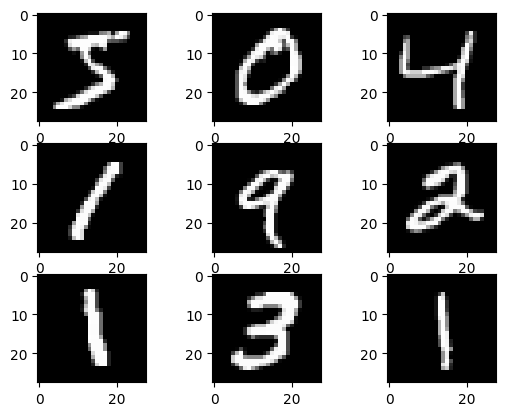

In [ ]:
### Gradficación de algunos de los datos
from matplotlib import pyplot as plt
for i in range(9):
  ### Definir subplots (9)
  plt.subplot(330 + 1 + i)
  ### mostrar la i imagen de x_train
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

#### Definición de parámetros de la Red Neuronal

A continuación, se procede a definir algunas características de la Red Neuronal: Número de capas ocultas, neuronas de la capa de entrada y de la capa de salida

In [ ]:
### Se definen la capa de entrada, capas ocultas y capa de salida con el número de neuronas correspondiente
n_input = 784  # input layer (28x28 pixels)
n_hidden1 = 512  # 1st hidden layer
n_hidden2 = 256  # 2nd hidden layer
n_hidden3 = 128  # 2nd hidden layer
n_output = 10  # output layer (0-9 digits)

Se deben normalizar los datos de manera que el rango se encuentre entre 0 y 1, para esto resulta necesario dividir por 255

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'datos de entrenamiento')
print(x_test.shape[0], 'datos de prueba')

### Se aplanan los datos en un vector 1D
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_train_flattened.shape

x_train shape: (60000, 28, 28)
60000 datos de entrenamiento
10000 datos de prueba


(60000, 784)

In [ ]:
#### Definición de arquitectura de la Red Neuronal
model = keras.Sequential([
    keras.layers.Dense(n_hidden1, input_shape=(784,), activation='relu'),
    keras.layers.Dense(n_hidden2, activation='relu'),
    keras.layers.Dense(n_hidden3, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
### Compilación del modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
### Entrenamiento del modelo
model.fit(x_train_flattened, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 231us/sample - loss: 0.1913 - accuracy: 0.9416
Epoch 2/5
60000/60000 [==============================] - 14s 225us/sample - loss: 0.0880 - accuracy: 0.9732
Epoch 3/5
60000/60000 [==============================] - 12s 196us/sample - loss: 0.0626 - accuracy: 0.9806
Epoch 4/5
60000/60000 [==============================] - 13s 211us/sample - loss: 0.0483 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 15s 257us/sample - loss: 0.0381 - accuracy: 0.9876


In [ ]:
# Se evalúa el rendimiento del modelo en el conjunto de prueba
model.evaluate(x_test_flattened, y_test)


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.10354953247410012, 0.9725]

Nótese que la precisión obtenida resulta ser de un **97,9%**

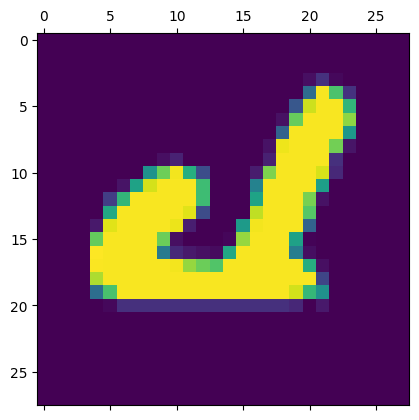

In [ ]:
indice = 8000 ### ingresar el indice del vector que se desea conocer
plt.matshow(x_test[indice])

In [ ]:
import numpy as np
y_predicted = model.predict(x_test_flattened)
y_predicted[indice]
np.argmax(y_predicted[indice])

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


4

**Prueba con red neuronal convolucional**

In [ ]:
x_train_conv = x_train.reshape(60000,28,28,1)
x_test_conv = x_test.reshape(10000,28,28,1)

In [ ]:
model_conv = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3),  activation='relu',input_shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(n_hidden1, activation='relu'),
    keras.layers.Dense(n_hidden2, activation='relu'),
    keras.layers.Dense(n_hidden3, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
### Compilación del modelo
model_conv.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
### Entrenamiento del modelo
model_conv.fit(x_train_conv, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 358us/sample - loss: 0.1392 - accuracy: 0.9577
Epoch 2/5
60000/60000 [==============================] - 14s 229us/sample - loss: 0.0469 - accuracy: 0.9860
Epoch 3/5
60000/60000 [==============================] - 14s 228us/sample - loss: 0.0247 - accuracy: 0.9924
Epoch 4/5
60000/60000 [==============================] - 14s 228us/sample - loss: 0.0177 - accuracy: 0.9944
Epoch 5/5
60000/60000 [==============================] - 14s 226us/sample - loss: 0.0154 - accuracy: 0.9956


In [ ]:
# Se evalúa el rendimiento del modelo en el conjunto de prueba
model_conv.evaluate(x_test_conv, y_test)

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.06540318975713144, 0.9854]

In [ ]:
y_predicted = model_conv.predict(x_test_conv)
y_predicted[indice]
np.argmax(y_predicted[indice])

4

### Conclusiones

- Se ha implementado un modelo de red neuronal destinada a la clasificación de digitos escritos a mano
- Con la estructura definida para la red neuronal, es posible obtener una precisión de 97% en la clasificación de los digitos
- La estructura consiste en una capa de entrada de 784 neuronas, tres capas ocultas con 512, 256 y 128 neuronas respectivamente y una de salida de 10 (correspondiente a l número total de digitos)
-Se implementa un modole con una red neuronal convolucional para contrastar el resultado obtenido con una red neuronal normal, el desempeño de las dos redes neuronales no cambia tanto debido a que las imagenes ya estan optimizadas, sin embargo en la red neuronal convolucional se obtiene una precision del 98%

#### Referencias

- https://www.milindsoorya.com/blog/handwritten-digits-classification
- Ballard, Hands-On Deep Learning for Images with TensorFlow, 2018
- https://www.escom.ipn.mx/docs/escomunidad/catt/articuloTecnicoTT.pdf